In [51]:
import pandas as pd
import numpy as np

from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from scipy import stats

## 1. Load the data

In [22]:
df = pd.read_csv('../../assets/datasets/airport_operations.csv')
df.sample(10)

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
614,PIT,2013,59106,59132,0.7887,0.7231,0.7631,13.18,13.52,3.58,16.10,2.06,1.23,2.65,14.12
589,PHL,2010,214485,214971,0.7824,0.6507,0.7700,13.40,18.95,7.49,19.97,6.41,1.96,3.50,14.13
405,MCI,2013,62289,62112,0.7950,0.7622,0.7621,12.69,11.61,2.84,14.59,1.79,1.07,2.59,14.05
384,LGA,2014,180282,180537,0.7599,0.5318,0.7498,15.75,24.61,11.21,25.92,4.79,2.34,3.19,16.47
403,MCI,2011,68122,68087,0.7992,0.7767,0.7844,12.58,11.28,2.21,13.89,2.56,0.96,2.60,12.63
687,SAT,2012,53839,53996,0.8082,0.7789,0.7840,10.82,11.39,2.74,12.58,1.69,1.10,2.45,11.76
719,SFO,2011,189552,190242,0.7655,0.6995,0.7165,14.81,16.43,4.40,18.24,3.66,2.15,3.84,18.37
797,TEB,2004,28711,28964,0.2889,0.3104,0.3800,38.41,9.11,0.00,36.89,6.28,0.00,6.09,31.14
86,BOS,2013,167549,164108,0.7987,0.7174,0.7682,12.81,18.19,5.29,17.08,3.20,1.87,3.46,13.77
165,DAY,2004,41845,41844,0.7263,0.6853,0.7494,14.95,13.53,3.79,17.18,1.61,0.58,2.59,14.27


In [23]:
df.describe()

,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
count,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000
mean,2009.028537,108257.063020,107815.561237,0.764119,0.714283,0.754281,13.561403,13.703389,3.519750,16.249964,2.921237,1.348894,3.330773,14.013222
std,3.156497,98278.401526,97916.908601,0.093361,0.101271,0.082302,4.746563,3.792181,2.391278,5.353012,1.201453,0.882252,1.026872,4.482215
min,2004.000000,261.000000,259.000000,0.246700,0.245700,0.324100,5.350000,7.040000,0.000000,6.290000,0.950000,0.000000,1.230000,6.330000
25%,2006.000000,37653.000000,37502.000000,0.745700,0.684800,0.737500,10.910000,11.260000,2.210000,12.950000,2.050000,0.800000,2.630000,11.300000
50%,2009.000000,72043.000000,71254.000000,0.782500,0.737200,0.768300,12.640000,12.810000,2.990000,15.220000,2.650000,1.080000,3.160000,13.080000
75%,2012.000000,162913.000000,160775.000000,0.809800,0.772200,0.796500,14.950000,15.650000,4.080000,17.940000,3.620000,1.740000,3.860000,15.250000
max,2014.000000,491826.000000,486799.000000,0.909700,0.897400,0.880300,40.800000,35.760000,18.940000,40.870000,7.820000,6.180000,7.520000,34.880000


## 2. Format and graph the data

#### 2.1 Plot the data

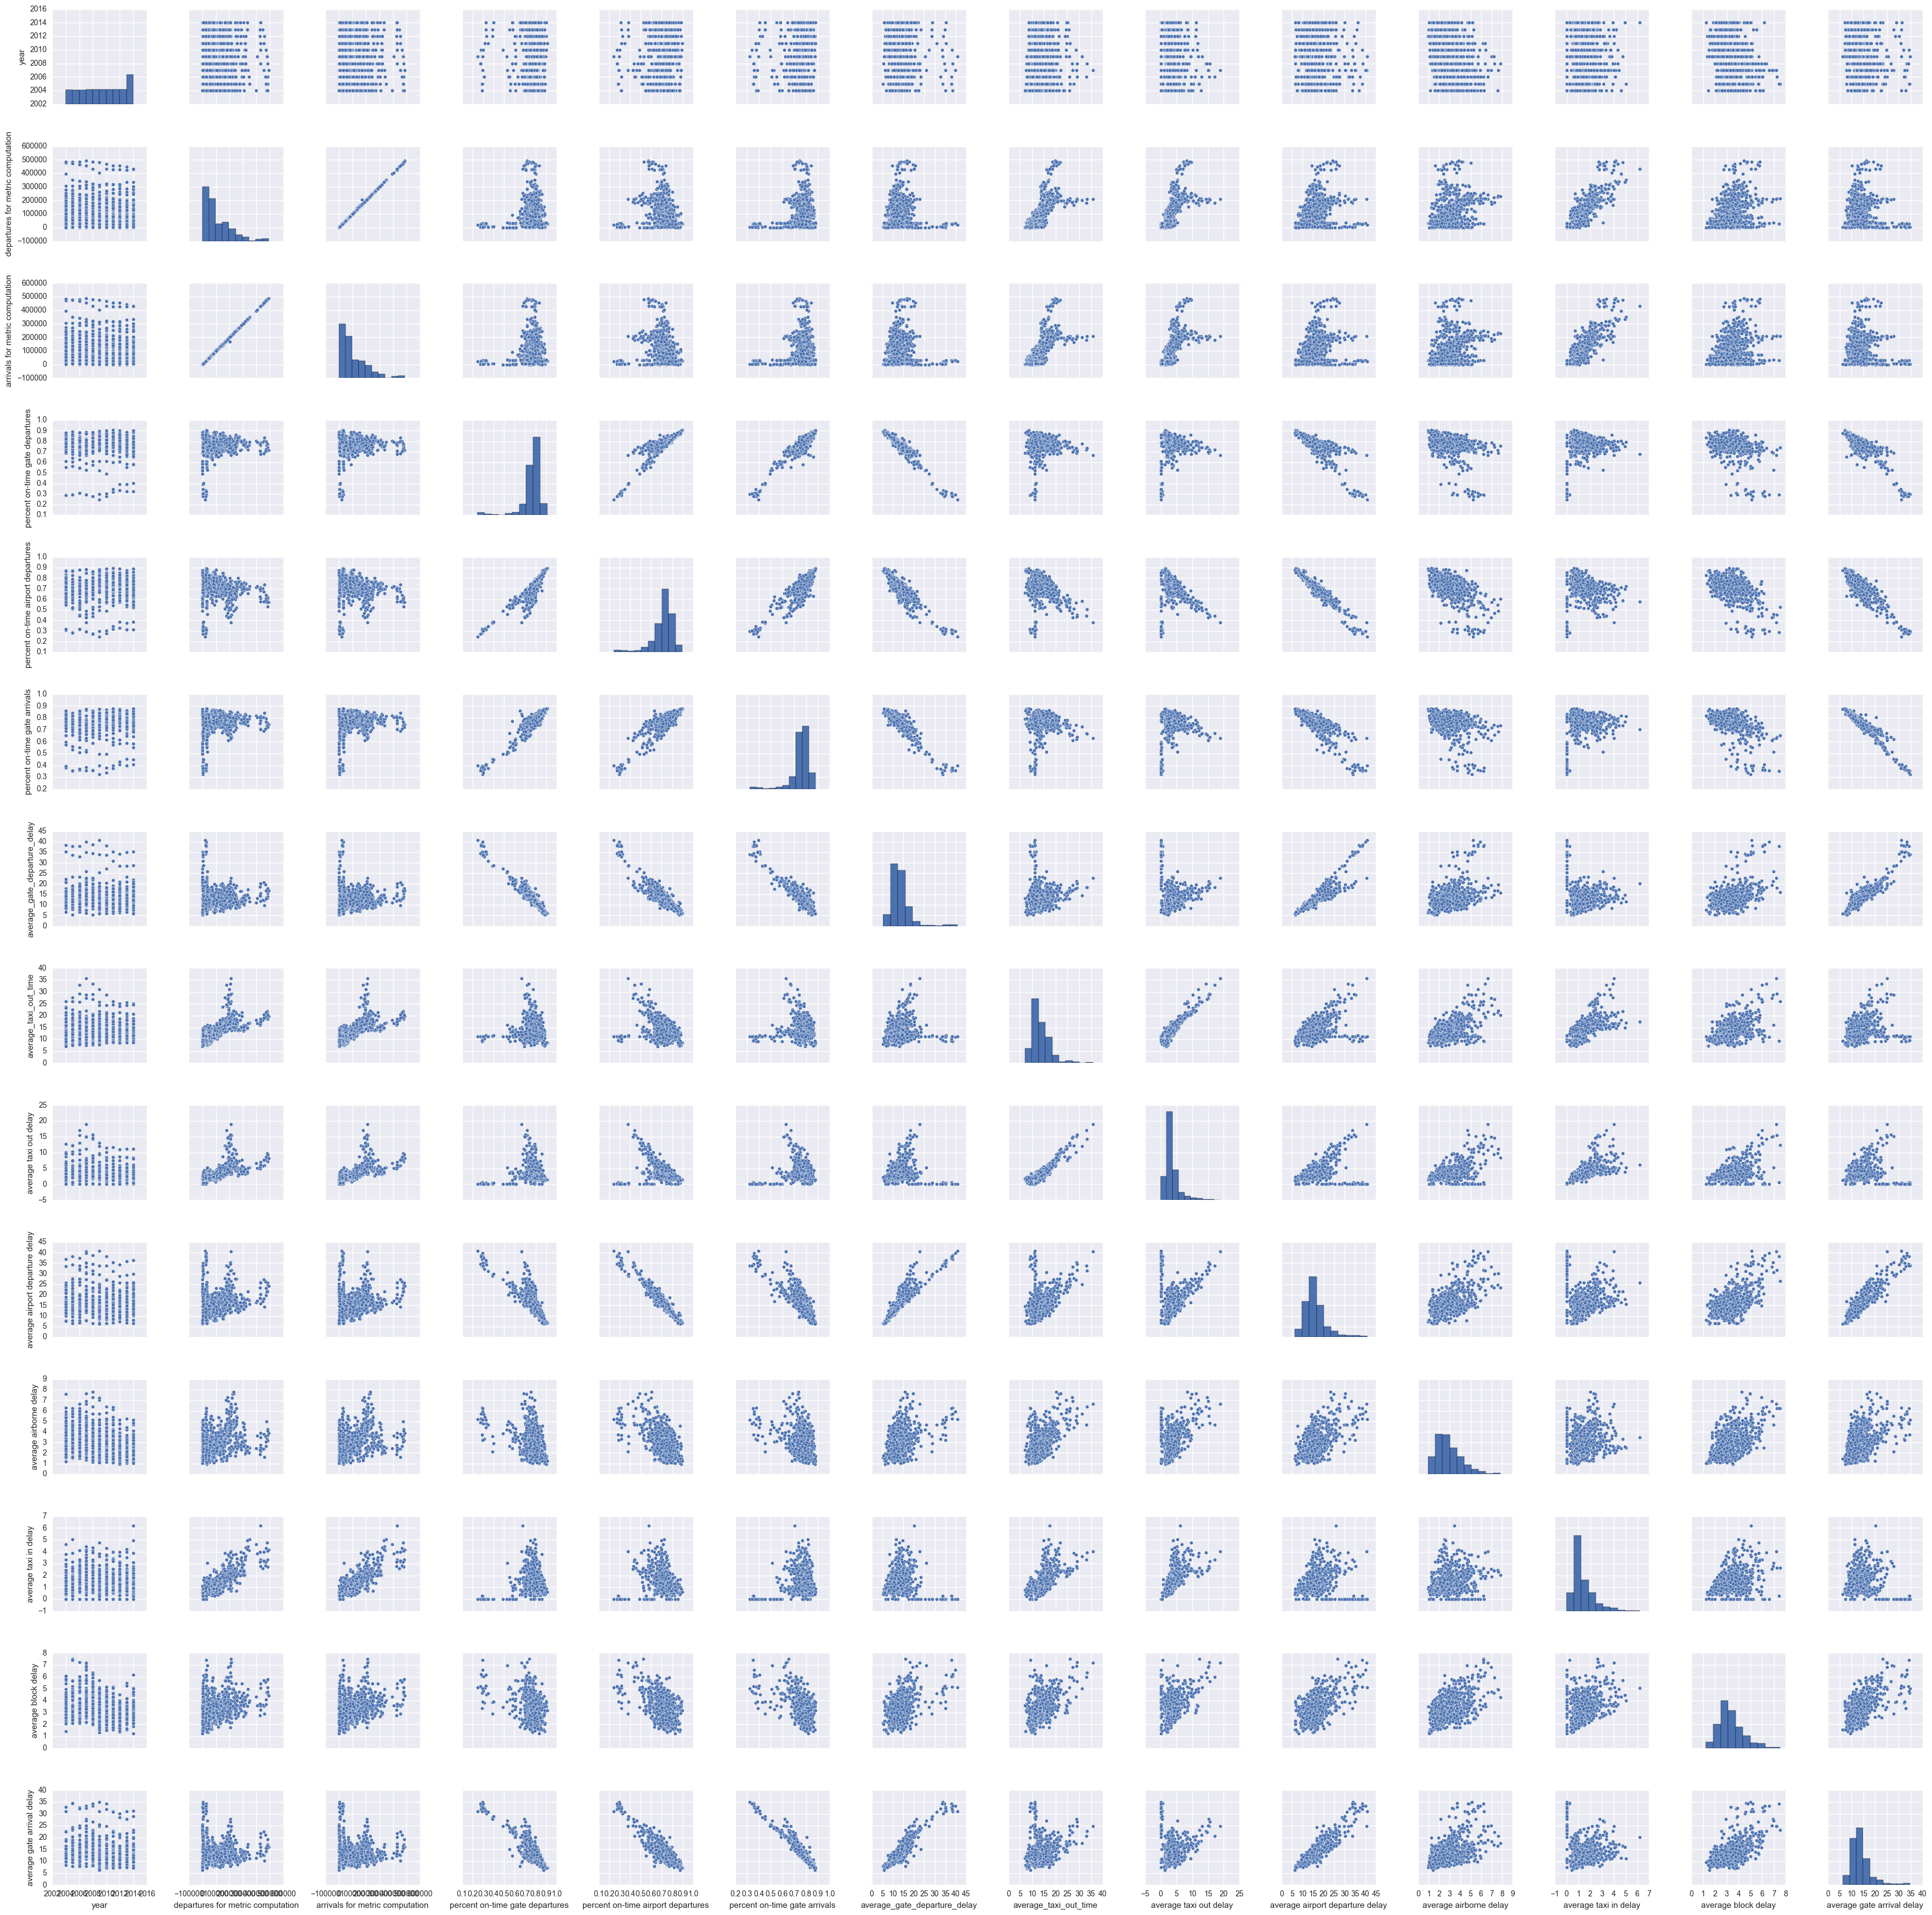

In [20]:
sns.pairplot(df)

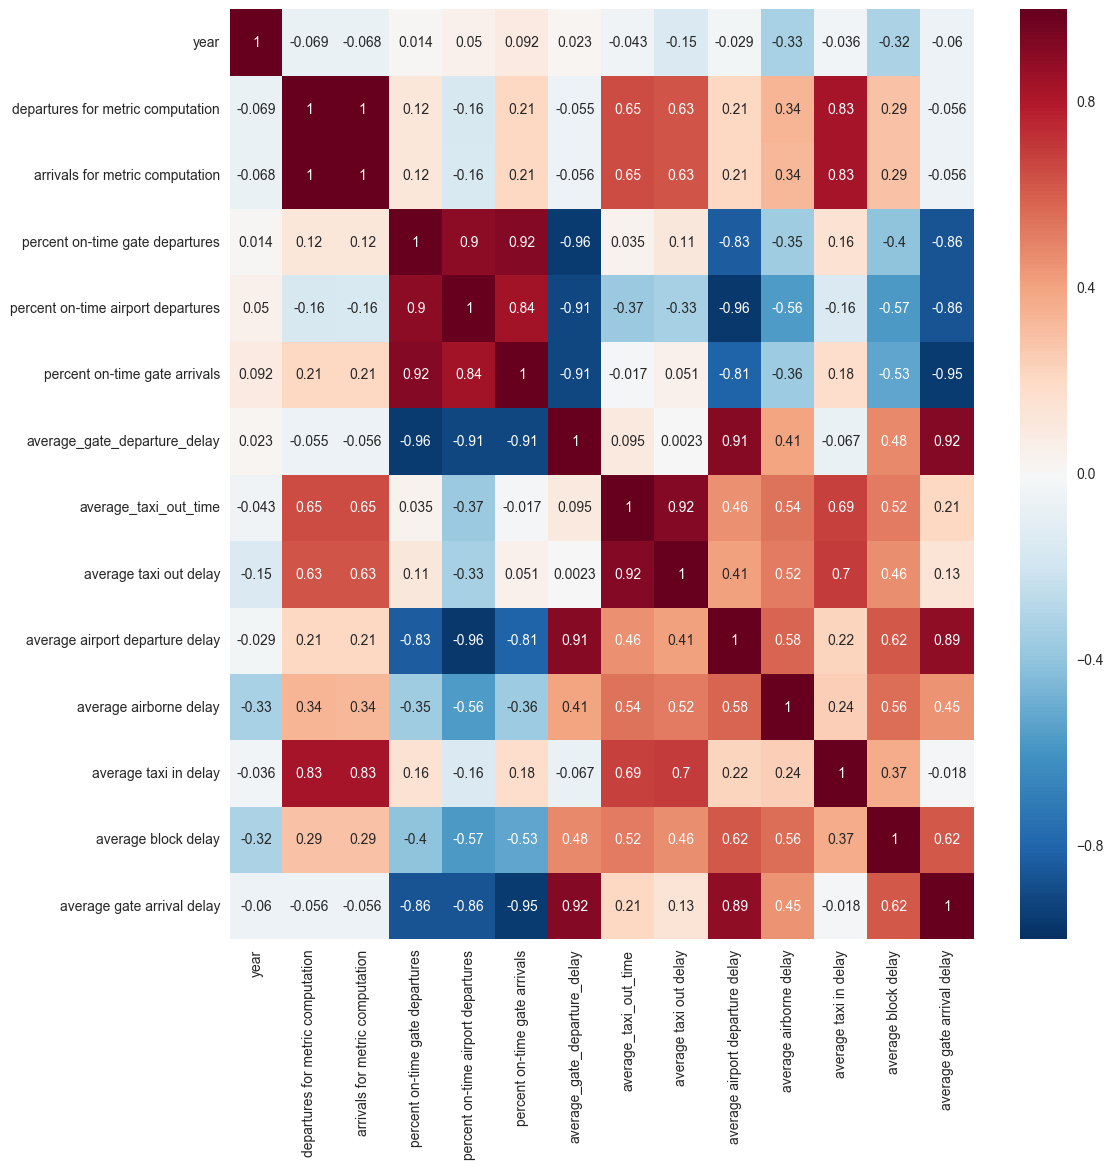

In [42]:
plt.figure(figsize = (12,12))
sns.heatmap(df.corr(), annot = True)

In [26]:
df.columns

Index([u'airport', u'year', u'departures for metric computation',
       u'arrivals for metric computation', u'percent on-time gate departures',
       u'percent on-time airport departures', u'percent on-time gate arrivals',
       u'average_gate_departure_delay', u'average_taxi_out_time',
       u'average taxi out delay', u'average airport departure delay',
       u'average airborne delay', u'average taxi in delay',
       u'average block delay', u'average gate arrival delay'],
      dtype='object')

In [ ]:
df.plot(kind = 'scatter', x = 'average_gate_departure_delay', y = )

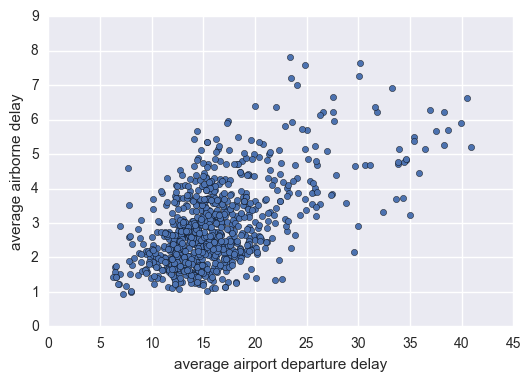

In [30]:
df.plot(kind = 'scatter', x = 'average airport departure delay', y = 'average airborne delay')

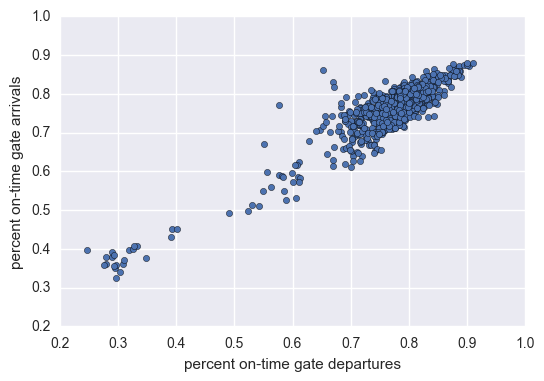

In [27]:
df.plot(kind = 'scatter', x= 'percent on-time gate departures' , y = 'percent on-time gate arrivals')

#### 2.2 Select columns of interest and standardize the data

In [44]:
X = df.drop(['airport', 'year', 'departures for metric computation', 
             'arrivals for metric computation', 'percent on-time airport departures', 
             'percent on-time gate arrivals', 'percent on-time gate departures'], axis = 1)

In [46]:
X_scale = pd.DataFrame(StandardScaler().fit_transform(X), columns = X.columns) 

In [48]:
X_scale.head()

,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,-0.670653,-1.006191,-0.455990,-0.775719,-0.384128,-0.588497,-0.760794,-0.701683
1,-0.835080,-1.032577,-0.514571,-0.943949,-0.550692,-0.520449,-0.965420,-0.842322
2,-0.573683,-1.006191,-0.568967,-0.732727,-0.667287,-0.577156,-0.653609,-0.489608
3,-0.478821,-0.887455,-0.468543,-0.616836,-0.608989,-0.066794,-0.263844,-0.290927
4,-0.584223,-0.868985,-0.464359,-0.734596,-0.917133,-0.361670,-0.526935,-0.565508


In [50]:
X_scale.describe().round(2)

,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
count,841.00,841.00,841.00,841.00,841.00,841.00,841.00,841.00
mean,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.73,-1.76,-1.47,-1.86,-1.64,-1.53,-2.05,-1.72
25%,-0.56,-0.64,-0.55,-0.62,-0.73,-0.62,-0.68,-0.61
50%,-0.19,-0.24,-0.22,-0.19,-0.23,-0.30,-0.17,-0.21
75%,0.29,0.51,0.23,0.32,0.58,0.44,0.52,0.28
max,5.74,5.82,6.45,4.60,4.08,5.48,4.08,4.66


In [37]:
x.head

<bound method DataFrame.head of      percent on-time gate departures  percent on-time airport departures  \
0                             0.8030                              0.7809   
1                             0.8140                              0.7922   
2                             0.7983                              0.7756   
3                             0.8005                              0.7704   
4                             0.8103                              0.7844   
5                             0.8341                              0.8147   
6                             0.8144                              0.7907   
7                             0.8072                              0.7758   
8                             0.8219                              0.7940   
9                             0.7710                              0.7402   
10                            0.7451                              0.7148   
11                            0.7109                    

## 3. DBSCAN

#### 3.1 Setup the DBSCAN from scikit

In [84]:
db = DBSCAN(eps=2, min_samples = 9).fit(X_scale)# min samples be atleast (# of columns + 1)

#### 3.2 Calculate the Labels

In [85]:
labels = db.labels_

#### 3.3 Calculate the Core Samples

In [86]:
samples = db.core_sample_indices_

In [87]:
print "core samples:\n", samples 
print "labels:\n", labels  

core samples:
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  16  17  18  19
  20  21  22  23  25  26  29  30  31  32  33  34  35  36  37  38  39  40
  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58
  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76
  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94
  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112
 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130
 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148
 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166
 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184
 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 226 227
 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 245 246 247
 250 252 253 254 255 256 257 258 259 

In [88]:
np.unique(labels, return_counts = True) # 

(array([-1,  0,  1]), array([ 14, 807,  20]))

#### 3.4 Plot the resulting clusters

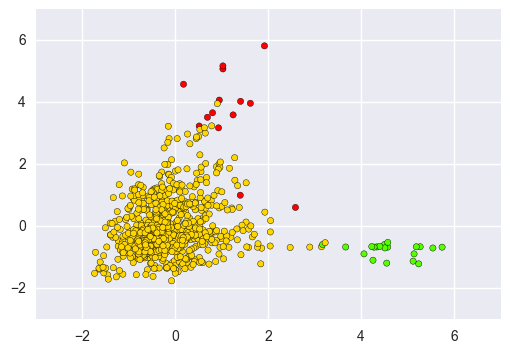

In [90]:
plt.scatter(X_scale.iloc[:,0], X_scale.iloc[:,1], c=labels, cmap='prism')

Now, repeat the above steps for various levels of minimum points and epsilon and see how that affects the results of the DBSCAN algorithm 

#### 3.5 Perform a K-means Clustering for comparison

In [24]:
KMeans(n_clusters=)

#### 3.6 Plot the resulting clusters

**Hint**: Display the results by cluster color and plot the centroids over the original plot for clarity

*Average airborne delay* and *on time gate arrivals*

*average taxi out time* and *average airport departure delay*